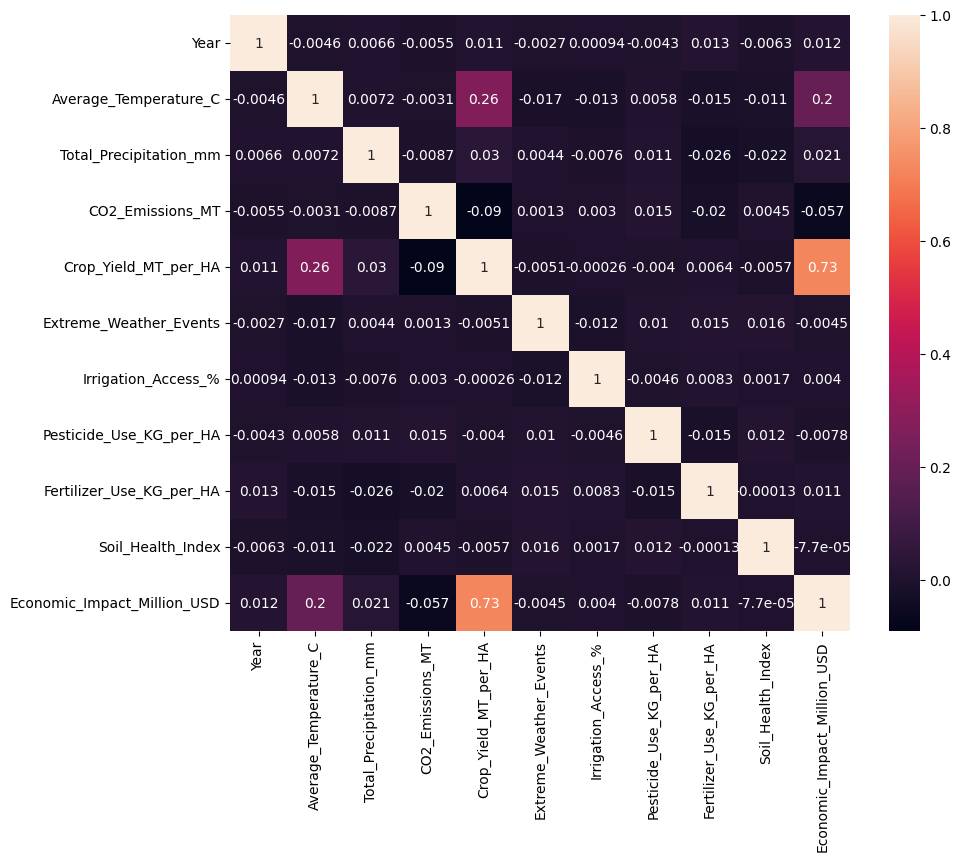

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("/content/climate_change_impact_on_agriculture_2024.csv")
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()


In [ ]:
numerical_df.corr()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
Year,1.000000,-0.004583,0.006551,-0.005461,0.010734,-0.002726,0.000938,-0.004332,0.013132,-0.006294,0.012419
Average_Temperature_C,-0.004583,1.000000,0.007213,-0.003052,0.263781,-0.016808,-0.013268,0.005764,-0.014725,-0.010841,0.195827
Total_Precipitation_mm,0.006551,0.007213,1.000000,-0.008681,0.029728,0.004360,-0.007580,0.011198,-0.026356,-0.021621,0.020966
CO2_Emissions_MT,-0.005461,-0.003052,-0.008681,1.000000,-0.089868,0.001255,0.002995,0.015243,-0.020275,0.004518,-0.057035
Crop_Yield_MT_per_HA,0.010734,0.263781,0.029728,-0.089868,1.000000,-0.005094,-0.000255,-0.004035,0.006423,-0.005692,0.726358
Extreme_Weather_Events,-0.002726,-0.016808,0.004360,0.001255,-0.005094,1.000000,-0.012051,0.010497,0.014754,0.016266,-0.004526
Irrigation_Access_%,0.000938,-0.013268,-0.007580,0.002995,-0.000255,-0.012051,1.000000,-0.004588,0.008314,0.001652,0.003988
Pesticide_Use_KG_per_HA,-0.004332,0.005764,0.011198,0.015243,-0.004035,0.010497,-0.004588,1.000000,-0.015429,0.012447,-0.007796
Fertilizer_Use_KG_per_HA,0.013132,-0.014725,-0.026356,-0.020275,0.006423,0.014754,0.008314,-0.015429,1.000000,-0.000125,0.010743
Soil_Health_Index,-0.006294,-0.010841,-0.021621,0.004518,-0.005692,0.016266,0.001652,0.012447,-0.000125,1.000000,-0.000077


In [ ]:
import plotly.express as px

# Aggregate data by country for visualization
country_data = df.groupby("Country", as_index=False).agg({
    "Crop_Yield_MT_per_HA": "mean",
    "Economic_Impact_Million_USD": "sum"
})

# Create a choropleth map based on Economic Impact
fig = px.choropleth(
    country_data,
    locations="Country",
    locationmode="country names",
    color="Economic_Impact_Million_USD",
    hover_name="Country",
    hover_data={"Crop_Yield_MT_per_HA": True},
    color_continuous_scale="YlGnBu",
    title="Economic Impact of Climate Change on Agriculture by Country"
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
import pycountry

# Load your CSV (replace this with your actual file path)
df = pd.read_csv("climate_change_impact_on_agriculture_2024.csv")

# Aggregate required variables by country
country_data = df.groupby("Country", as_index=False).agg({
    "Crop_Yield_MT_per_HA": "mean",
    "Economic_Impact_Million_USD": "sum",
    "Average_Temperature_C": "mean",
    "Total_Precipitation_mm": "mean",
    "CO2_Emissions_MT": "mean",
    "Extreme_Weather_Events": "mean"
})

# Convert country names to ISO-3 codes for mapping
def get_country_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

country_data["iso_alpha"] = country_data["Country"].apply(get_country_iso3)
country_data = country_data.dropna(subset=["iso_alpha"])

# Create choropleth map
fig = px.choropleth(
    country_data,
    locations="iso_alpha",
    color="Economic_Impact_Million_USD",
    hover_name="Country",
    hover_data={
        "Crop_Yield_MT_per_HA": True,
        "Average_Temperature_C": True,
        "Total_Precipitation_mm": True,
        "CO2_Emissions_MT": True,
        "Extreme_Weather_Events": True
    },
    color_continuous_scale="YlGnBu",
    title="Economic Impact of Climate Change on Agriculture by Country with Climate Factors"
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


In [ ]:
df=pd.read_csv("/content/climate_change_impact_on_agriculture_2024.csv")

In [ ]:
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

<Axes: xlabel='Year', ylabel='Average_Temperature_C'>

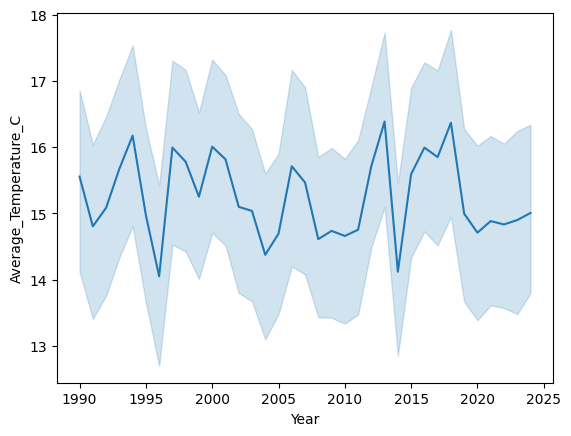

In [ ]:
import seaborn as sns
sns.lineplot(df,x ='Year', y = "Average_Temperature_C")

In [ ]:
temp_df= df ["Adaptation_Strategies"].value_counts().reset_index()

In [ ]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:
import plotly.express as px

# Replace temp_df with your actual DataFrame name if different
fig = px.bar(
    df,
    x="Adaptation_Strategies",
    y="count",
    color=df["Crop_Type"],  # Each crop type will have a different color
    barmode="group",    # Group bars side-by-side
    title="Adaptation Strategies by Crop Type",
    labels={"count": "Count", "Adaptation_Strategies": "Adaptation Strategies"},
    height=500
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


ValueError: All arguments should have the same length. The length of argument `color` is 10000, whereas the length of  previously-processed arguments ['Adaptation_Strategies', 'count'] is 5

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Method 1: If you have the actual dataset, use this approach
def create_adaptation_strategies_chart_from_data(df):
    """
    Create adaptation strategies chart from your actual dataset
    Assumes your df has columns like 'Adaptation_Strategies' and 'Crop_Type'
    """
    # Count occurrences of each combination
    strategy_counts = df.groupby(['Adaptation_Strategies', 'Crop_Type']).size().reset_index(name='count')

    # Create the grouped bar chart
    fig = px.bar(
        strategy_counts,
        x="Adaptation_Strategies",
        y="count",
        color="Crop_Type",  # Each crop type will have a different color
        barmode="group",    # Group bars side-by-side
        title="Adaptation Strategies by Crop Type",
        labels={"count": "Count", "Adaptation_Strategies": "Adaptation Strategies"},
        height=500
    )

    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

    return fig

# Method 2: If your data structure is different, use this flexible approach
def create_adaptation_strategies_chart_flexible(df, strategy_col, crop_col):
    """
    Flexible function that works with any column names

    Parameters:
    df: your dataframe
    strategy_col: name of the column containing adaptation strategies
    crop_col: name of the column containing crop types
    """
    # Count occurrences of each combination
    strategy_counts = df.groupby([strategy_col, crop_col]).size().reset_index(name='count')

    # Create the grouped bar chart
    fig = px.bar(
        strategy_counts,
        x=strategy_col,
        y="count",
        color=crop_col,
        barmode="group",
        title=f"Adaptation Strategies by {crop_col}",
        labels={"count": "Count", strategy_col: "Adaptation Strategies"},
        height=500
    )

    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

    return fig

# Method 3: If you don't have adaptation strategies in your dataset, create sample data
def create_sample_data_with_strategies():
    """
    Create sample data that includes adaptation strategies
    Use this if your original dataset doesn't have adaptation strategies
    """
    # Sample adaptation strategies
    adaptation_strategies = [
        'Drought-resistant varieties',
        'Irrigation improvement',
        'Crop rotation',
        'Soil management',
        'Pest management',
        'Early planting',
        'Greenhouse cultivation',
        'Water conservation'
    ]

    # Sample crop types
    crop_types = ['Wheat', 'Rice', 'Corn', 'Soybeans', 'Barley']

    # Generate sample data
    np.random.seed(42)
    n_records = 1000

    sample_data = {
        'Crop_Type': np.random.choice(crop_types, n_records),
        'Adaptation_Strategies': np.random.choice(adaptation_strategies, n_records),
        'Year': np.random.choice(range(2000, 2025), n_records),
        'Region': np.random.choice(['North America', 'Europe', 'Asia', 'Africa', 'South America'], n_records)
    }

    # Create DataFrame
    df_sample = pd.DataFrame(sample_data)

    return df_sample

# Method 4: Enhanced version with percentage calculations
def create_enhanced_adaptation_chart(df, strategy_col='Adaptation_Strategies', crop_col='Crop_Type'):
    """
    Create an enhanced chart with both counts and percentages
    """
    # Count occurrences
    strategy_counts = df.groupby([strategy_col, crop_col]).size().reset_index(name='count')

    # Calculate total for each crop type for percentage calculation
    crop_totals = df[crop_col].value_counts().to_dict()
    strategy_counts['crop_total'] = strategy_counts[crop_col].map(crop_totals)
    strategy_counts['percentage'] = (strategy_counts['count'] / strategy_counts['crop_total'] * 100).round(2)

    # Create the main chart
    fig = px.bar(
        strategy_counts,
        x=strategy_col,
        y="count",
        color=crop_col,
        barmode="group",
        title="Adaptation Strategies by Crop Type",
        labels={"count": "Count", strategy_col: "Adaptation Strategies"},
        height=500,
        hover_data=['percentage']  # Show percentage on hover
    )

    fig.update_layout(
        xaxis_tickangle=-45,
        xaxis_title="Adaptation Strategies",
        yaxis_title="Count",
        legend_title="Crop Type"
    )

    fig.show()

    return fig, strategy_counts

# Example usage and demonstration
if __name__ == "__main__":
    print("=== ADAPTATION STRATEGIES VISUALIZATION ===\n")

    # Create sample data for demonstration
    print("Creating sample data...")
    df_sample = create_sample_data_with_strategies()
    print(f"Sample data created with shape: {df_sample.shape}")
    print("\nSample data preview:")
    print(df_sample.head(10))

    print("\n" + "="*50)
    print("BASIC ADAPTATION STRATEGIES CHART")
    print("="*50)

    # Method 1: Basic chart
    fig1 = create_adaptation_strategies_chart_from_data(df_sample)

    print("\n" + "="*50)
    print("ENHANCED CHART WITH PERCENTAGES")
    print("="*50)

    # Method 4: Enhanced chart
    fig2, counts_df = create_enhanced_adaptation_chart(df_sample)

    print("\nStrategy counts summary:")
    print(counts_df.head(10))

    # Show summary statistics
    print("\n" + "="*50)
    print("SUMMARY STATISTICS")
    print("="*50)

    total_strategies = len(df_sample['Adaptation_Strategies'].unique())
    total_crops = len(df_sample['Crop_Type'].unique())

    print(f"Total unique adaptation strategies: {total_strategies}")
    print(f"Total crop types: {total_crops}")
    print(f"Total records: {len(df_sample)}")

    print("\nTop 5 most common strategies:")
    top_strategies = df_sample['Adaptation_Strategies'].value_counts().head()
    for strategy, count in top_strategies.items():
        print(f"  {strategy}: {count}")

    print("\nStrategies by crop type:")
    strategy_by_crop = df_sample.groupby('Crop_Type')['Adaptation_Strategies'].nunique().sort_values(ascending=False)
    for crop, strategy_count in strategy_by_crop.items():
        print(f"  {crop}: {strategy_count} different strategies")



=== ADAPTATION STRATEGIES VISUALIZATION ===

Creating sample data...
Sample data created with shape: (1000, 4)

Sample data preview:
  Crop_Type   Adaptation_Strategies  Year         Region
0  Soybeans         Soil management  2022         Africa
1    Barley         Soil management  2011  North America
2      Corn         Soil management  2016  South America
3    Barley      Water conservation  2007         Africa
4    Barley         Soil management  2010  North America
5      Rice         Pest management  2002         Africa
6      Corn      Water conservation  2005  South America
7      Corn         Pest management  2008           Asia
8      Corn      Water conservation  2005  South America
9    Barley  Greenhouse cultivation  2008         Europe

BASIC ADAPTATION STRATEGIES CHART



ENHANCED CHART WITH PERCENTAGES



Strategy counts summary:
         Adaptation_Strategies Crop_Type  count  crop_total  percentage
0                Crop rotation    Barley     28         204       13.73
1                Crop rotation      Corn     20         190       10.53
2                Crop rotation      Rice     31         190       16.32
3                Crop rotation  Soybeans     31         206       15.05
4                Crop rotation     Wheat     18         210        8.57
5  Drought-resistant varieties    Barley     24         204       11.76
6  Drought-resistant varieties      Corn     21         190       11.05
7  Drought-resistant varieties      Rice     28         190       14.74
8  Drought-resistant varieties  Soybeans     24         206       11.65
9  Drought-resistant varieties     Wheat     39         210       18.57

SUMMARY STATISTICS
Total unique adaptation strategies: 8
Total crop types: 5
Total records: 1000

Top 5 most common strategies:
  Drought-resistant varieties: 136
  Irrigation impro

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Method 1: Dual Y-axis plot (Bar + Line on same plot)
def create_strategies_with_impact_dual_axis(df, strategy_col='Adaptation_Strategies',
                                           crop_col='Crop_Type', impact_col='Impact_Score'):
    """
    Create a combination plot with adaptation strategies (bars) and impact trends (lines)
    using dual y-axes
    """
    # Count occurrences of strategies
    strategy_counts = df.groupby([strategy_col, crop_col]).size().reset_index(name='count')

    # Calculate average impact by strategy
    impact_by_strategy = df.groupby(strategy_col)[impact_col].mean().reset_index()
    impact_by_strategy = impact_by_strategy.sort_values(strategy_col)

    # Create subplot with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add bar chart for strategy counts by crop type
    crop_types = df[crop_col].unique()
    colors = px.colors.qualitative.Set1[:len(crop_types)]

    for i, crop in enumerate(crop_types):
        crop_data = strategy_counts[strategy_counts[crop_col] == crop]
        fig.add_trace(
            go.Bar(
                x=crop_data[strategy_col],
                y=crop_data['count'],
                name=f'{crop} (Count)',
                marker_color=colors[i],
                opacity=0.7
            ),
            secondary_y=False,
        )

    # Add line plot for average impact
    fig.add_trace(
        go.Scatter(
            x=impact_by_strategy[strategy_col],
            y=impact_by_strategy[impact_col],
            mode='lines+markers',
            name='Average Impact',
            line=dict(color='red', width=3),
            marker=dict(size=8, color='red'),
            yaxis='y2'
        ),
        secondary_y=True,
    )

    # Update layout
    fig.update_xaxes(title_text="Adaptation Strategies", tickangle=-45)
    fig.update_yaxes(title_text="Strategy Count", secondary_y=False)
    fig.update_yaxes(title_text="Average Impact Score", secondary_y=True)

    fig.update_layout(
        title="Adaptation Strategies by Crop Type with Impact Trends",
        height=600,
        legend=dict(x=0.02, y=0.98)
    )

    return fig

# Method 2: Subplots approach (Side-by-side)
def create_strategies_impact_subplots(df, strategy_col='Adaptation_Strategies',
                                     crop_col='Crop_Type', impact_col='Impact_Score'):
    """
    Create side-by-side subplots: strategies bar chart + impact trends
    """
    # Prepare data
    strategy_counts = df.groupby([strategy_col, crop_col]).size().reset_index(name='count')
    impact_by_strategy = df.groupby([strategy_col, crop_col])[impact_col].mean().reset_index()

    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Adaptation Strategies by Crop Type', 'Impact Trends by Strategy'),
        specs=[[{"type": "bar"}, {"type": "scatter"}]],
        column_widths=[0.6, 0.4]
    )

    # Add bar chart
    crop_types = df[crop_col].unique()
    colors = px.colors.qualitative.Set1[:len(crop_types)]

    for i, crop in enumerate(crop_types):
        crop_data = strategy_counts[strategy_counts[crop_col] == crop]
        fig.add_trace(
            go.Bar(
                x=crop_data[strategy_col],
                y=crop_data['count'],
                name=crop,
                marker_color=colors[i],
                opacity=0.8,
                showlegend=True
            ),
            row=1, col=1
        )

    # Add line plots for impact
    for i, crop in enumerate(crop_types):
        crop_impact = impact_by_strategy[impact_by_strategy[crop_col] == crop]
        fig.add_trace(
            go.Scatter(
                x=crop_impact[strategy_col],
                y=crop_impact[impact_col],
                mode='lines+markers',
                name=f'{crop} Impact',
                line=dict(color=colors[i], width=2),
                marker=dict(size=6),
                showlegend=False
            ),
            row=1, col=2
        )

    # Update layout
    fig.update_xaxes(title_text="Adaptation Strategies", tickangle=-45, row=1, col=1)
    fig.update_xaxes(title_text="Adaptation Strategies", tickangle=-45, row=1, col=2)
    fig.update_yaxes(title_text="Count", row=1, col=1)
    fig.update_yaxes(title_text="Impact Score", row=1, col=2)

    fig.update_layout(
        title="Adaptation Strategies and Impact Analysis",
        height=500,
        showlegend=True
    )

    return fig

# Method 3: Stacked layout (Vertical subplots)
def create_strategies_impact_stacked(df, strategy_col='Adaptation_Strategies',
                                   crop_col='Crop_Type', impact_col='Impact_Score'):
    """
    Create vertically stacked plots: strategies on top, impact trends below
    """
    # Prepare data
    strategy_counts = df.groupby([strategy_col, crop_col]).size().reset_index(name='count')

    # Calculate impact trends over time if year column exists
    if 'Year' in df.columns:
        impact_trends = df.groupby(['Year', strategy_col])[impact_col].mean().reset_index()
    else:
        impact_trends = df.groupby(strategy_col)[impact_col].mean().reset_index()
        impact_trends['Year'] = 2020  # Default year for demonstration

    # Create subplots
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=('Adaptation Strategies by Crop Type', 'Impact Trends Over Time'),
        specs=[[{"type": "bar"}], [{"type": "scatter"}]],
        row_heights=[0.6, 0.4]
    )

    # Add bar chart (top)
    crop_types = df[crop_col].unique()
    colors = px.colors.qualitative.Set1[:len(crop_types)]

    for i, crop in enumerate(crop_types):
        crop_data = strategy_counts[strategy_counts[crop_col] == crop]
        fig.add_trace(
            go.Bar(
                x=crop_data[strategy_col],
                y=crop_data['count'],
                name=crop,
                marker_color=colors[i],
                opacity=0.8
            ),
            row=1, col=1
        )

    # Add impact trends (bottom)
    strategies = df[strategy_col].unique()[:5]  # Top 5 strategies for clarity

    for i, strategy in enumerate(strategies):
        if 'Year' in df.columns:
            strategy_data = impact_trends[impact_trends[strategy_col] == strategy]
            fig.add_trace(
                go.Scatter(
                    x=strategy_data['Year'],
                    y=strategy_data[impact_col],
                    mode='lines+markers',
                    name=f'{strategy}',
                    line=dict(width=2),
                    marker=dict(size=4),
                    showlegend=False
                ),
                row=2, col=1
            )

    # Update layout
    fig.update_xaxes(title_text="Adaptation Strategies", tickangle=-45, row=1, col=1)
    fig.update_xaxes(title_text="Year", row=2, col=1)
    fig.update_yaxes(title_text="Count", row=1, col=1)
    fig.update_yaxes(title_text="Average Impact Score", row=2, col=1)

    fig.update_layout(
        title="Adaptation Strategies and Their Impact Over Time",
        height=700,
        showlegend=True
    )

    return fig

# Method 4: Advanced 3D visualization
def create_3d_strategies_impact(df, strategy_col='Adaptation_Strategies',
                               crop_col='Crop_Type', impact_col='Impact_Score'):
    """
    Create a 3D visualization showing strategies, crop types, and impact
    """
    # Aggregate data
    agg_data = df.groupby([strategy_col, crop_col]).agg({
        impact_col: 'mean',
        crop_col: 'size'  # This will give us count
    }).reset_index()
    agg_data.columns = [strategy_col, crop_col, 'avg_impact', 'count']

    # Create 3D scatter plot
    fig = go.Figure(data=go.Scatter3d(
        x=agg_data[strategy_col],
        y=agg_data[crop_col],
        z=agg_data['avg_impact'],
        mode='markers',
        marker=dict(
            size=agg_data['count'],
            sizemode='diameter',
            sizeref=2.*max(agg_data['count'])/(40.**2),
            color=agg_data['avg_impact'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Impact Score")
        ),
        text=[f'Strategy: {s}<br>Crop: {c}<br>Impact: {i:.2f}<br>Count: {cnt}'
              for s, c, i, cnt in zip(agg_data[strategy_col], agg_data[crop_col],
                                     agg_data['avg_impact'], agg_data['count'])],
        hovertemplate='%{text}<extra></extra>'
    ))

    fig.update_layout(
        title='3D View: Strategies × Crop Types × Impact',
        scene=dict(
            xaxis_title='Adaptation Strategies',
            yaxis_title='Crop Types',
            zaxis_title='Average Impact Score'
        ),
        height=600
    )

    return fig

# Create sample data with impact scores
def create_sample_data_with_impact():
    """
    Create comprehensive sample data including impact scores
    """
    np.random.seed(42)

    # Sample data parameters
    adaptation_strategies = [
        'Drought-resistant varieties', 'Irrigation improvement', 'Crop rotation',
        'Soil management', 'Pest management', 'Early planting',
        'Greenhouse cultivation', 'Water conservation'
    ]

    crop_types = ['Wheat', 'Rice', 'Corn', 'Soybeans', 'Barley']
    regions = ['North America', 'Europe', 'Asia', 'Africa', 'South America']
    years = list(range(2015, 2025))

    n_records = 1500

    # Generate base data
    data = {
        'Year': np.random.choice(years, n_records),
        'Region': np.random.choice(regions, n_records),
        'Crop_Type': np.random.choice(crop_types, n_records),
        'Adaptation_Strategies': np.random.choice(adaptation_strategies, n_records)
    }

    df = pd.DataFrame(data)

    # Create realistic impact scores based on strategies and crops
    impact_base = {
        'Drought-resistant varieties': 8.5,
        'Irrigation improvement': 7.8,
        'Crop rotation': 6.5,
        'Soil management': 7.2,
        'Pest management': 6.8,
        'Early planting': 5.9,
        'Greenhouse cultivation': 9.1,
        'Water conservation': 7.5
    }

    crop_multiplier = {
        'Wheat': 1.0,
        'Rice': 1.1,
        'Corn': 0.95,
        'Soybeans': 1.05,
        'Barley': 0.9
    }

    # Calculate impact scores
    df['Impact_Score'] = df.apply(lambda row:
        impact_base[row['Adaptation_Strategies']] *
        crop_multiplier[row['Crop_Type']] +
        np.random.normal(0, 0.5), axis=1
    )

    # Ensure impact scores are within reasonable range
    df['Impact_Score'] = np.clip(df['Impact_Score'], 1, 10)
    df['Impact_Score'] = df['Impact_Score'].round(2)

    # Add some additional metrics
    df['Yield_Change_Percent'] = df['Impact_Score'] * np.random.uniform(2, 5, n_records)
    df['Implementation_Cost'] = np.random.uniform(1000, 50000, n_records)

    return df

# Example usage and demonstration
if __name__ == "__main__":
    print("=== ADAPTATION STRATEGIES WITH IMPACT VISUALIZATION ===\n")

    # Create sample data
    print("Creating sample data with impact scores...")
    df_sample = create_sample_data_with_impact()
    print(f"Sample data created with shape: {df_sample.shape}")
    print("\nSample data preview:")
    print(df_sample.head())

    print(f"\nImpact Score range: {df_sample['Impact_Score'].min():.2f} - {df_sample['Impact_Score'].max():.2f}")
    print(f"Average Impact Score: {df_sample['Impact_Score'].mean():.2f}")

    print("\n" + "="*60)
    print("METHOD 1: DUAL Y-AXIS PLOT")
    print("="*60)

    fig1 = create_strategies_with_impact_dual_axis(df_sample)
    fig1.show()

    print("\n" + "="*60)
    print("METHOD 2: SIDE-BY-SIDE SUBPLOTS")
    print("="*60)

    fig2 = create_strategies_impact_subplots(df_sample)
    fig2.show()

    print("\n" + "="*60)
    print("METHOD 3: STACKED VERTICAL PLOTS")
    print("="*60)

    fig3 = create_strategies_impact_stacked(df_sample)
    fig3.show()

    print("\n" + "="*60)
    print("METHOD 4: 3D VISUALIZATION")
    print("="*60)

    fig4 = create_3d_strategies_impact(df_sample)
    fig4.show()

    # Summary statistics
    print("\n" + "="*60)
    print("IMPACT ANALYSIS SUMMARY")
    print("="*60)

    # Top strategies by impact
    top_strategies = df_sample.groupby('Adaptation_Strategies')['Impact_Score'].mean().sort_values(ascending=False)
    print("\nTop 5 strategies by average impact:")
    for strategy, impact in top_strategies.head().items():
        print(f"  {strategy}: {impact:.2f}")

    # Impact by crop type
    impact_by_crop = df_sample.groupby('Crop_Type')['Impact_Score'].mean().sort_values(ascending=False)
    print("\nAverage impact by crop type:")
    for crop, impact in impact_by_crop.items():
        print(f"  {crop}: {impact:.2f}")

    # Strategy effectiveness analysis
    print("\nStrategy effectiveness analysis:")
    effectiveness = df_sample.groupby('Adaptation_Strategies').agg({
        'Impact_Score': ['mean', 'std', 'count']
    }).round(2)
    effectiveness.columns = ['Avg_Impact', 'Impact_Std', 'Usage_Count']
    effectiveness = effectiveness.sort_values('Avg_Impact', ascending=False)
    print(effectiveness)

print("""
HOW TO USE WITH YOUR ACTUAL DATA:
=================================

1. For dual y-axis plot (bars + line):
   fig = create_strategies_with_impact_dual_axis(your_df, 'strategy_col', 'crop_col', 'impact_col')

2. For side-by-side subplots:
   fig = create_strategies_impact_subplots(your_df, 'strategy_col', 'crop_col', 'impact_col')

3. For stacked vertical plots:
   fig = create_strategies_impact_stacked(your_df, 'strategy_col', 'crop_col', 'impact_col')

4. For 3D visualization:
   fig = create_3d_strategies_impact(your_df, 'strategy_col', 'crop_col', 'impact_col')

REQUIRED COLUMNS:
================
- Adaptation strategy column (e.g., 'Adaptation_Strategies')
- Crop type column (e.g., 'Crop_Type')
- Impact measure column (e.g., 'Impact_Score', 'Yield_Change', 'Effectiveness_Rating')

If you don't have an impact column, you can create one based on:
- Yield improvements
- Cost-benefit ratios
- Effectiveness ratings
- Climate resilience scores
""")

=== ADAPTATION STRATEGIES WITH IMPACT VISUALIZATION ===

Creating sample data with impact scores...
Sample data created with shape: (1500, 7)

Sample data preview:
   Year         Region Crop_Type        Adaptation_Strategies  Impact_Score  \
0  2021  South America      Corn                Crop rotation          6.12   
1  2018         Africa      Rice              Soil management          7.67   
2  2022         Africa  Soybeans           Water conservation          9.19   
3  2019         Africa      Corn  Drought-resistant varieties          8.34   
4  2021         Europe    Barley       Greenhouse cultivation          8.28   

   Yield_Change_Percent  Implementation_Cost  
0             18.679032         22916.375440  
1             33.123050          4546.443267  
2             40.523411         47752.450437  
3             20.518390         11939.514652  
4             25.665131         46193.080999  

Impact Score range: 4.39 - 10.00
Average Impact Score: 7.38

METHOD 1: DUAL Y-


METHOD 2: SIDE-BY-SIDE SUBPLOTS



METHOD 3: STACKED VERTICAL PLOTS



METHOD 4: 3D VISUALIZATION


ValueError: cannot insert Crop_Type, already exists

In [ ]:
df["Crop_Type"].value_counts()

,count
Crop_Type,
Wheat,1047
Cotton,1044
Vegetables,1036
Corn,1022
Rice,1022
Sugarcane,995
Fruits,979
Soybeans,958
Barley,952


#
6.	scikit-learn - Popular open-source Python library for machine learning, providing a wide range of algorithms and tools for tasks such as classification, regression, clustering, and more. Built on top of other Python libraries like NumPy and SciPy, and is known for its simplicity, efficiency, and ease of use in building and deploying machine learning models.